# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
# uncomment next line if you have retina display
# %config InlineBackend.figure_format="retina"

Let's generate our dataset and take a look on it.

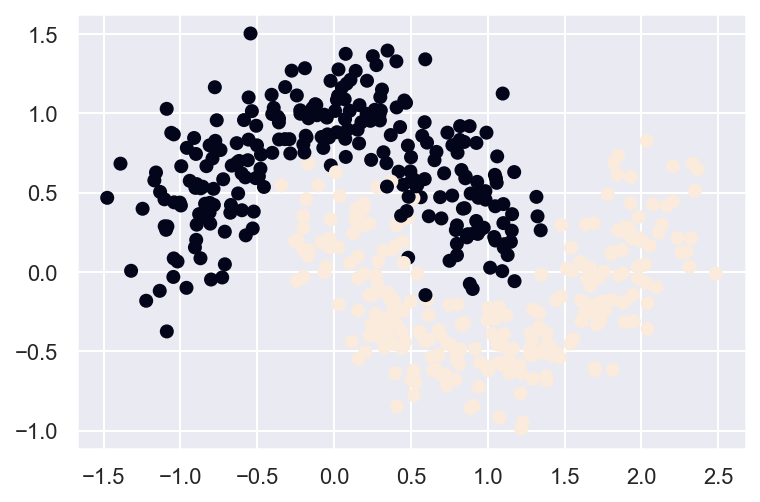

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from mlxtend.plotting import plot_decision_regions

In [4]:
lr = LogisticRegression(random_state=42, tol=1e-3, penalty='none')
svm = SVC(kernel='linear', random_state=42, tol=1e-3, C=10)
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, random_state=42, test_size=0.35)

In [5]:
def plot_decisions_regions(estimator, estimator_name: str,
                           X_train, X_test, y_train, y_test, 
                           needs_fit: bool = True, is_multiclass: bool = False):
    if needs_fit:
        estimator.fit(X_train, y_train)
    pred = estimator.predict(X_test)
    fig, axis = plt.subplots()
    fig.set_size_inches(15, 8)
    all_targets = np.hstack((y_train, y_test))
    plot_decision_regions(np.vstack((X_train, X_test)), all_targets, clf=estimator, legend=2)
    axis.set_title(f'Decision regions for {estimator_name}', fontsize = 20)
    plt.show()
    print(f'Accuracy score of {estimator_name} is {accuracy_score(y_test, pred):.3f}')
    f1_scores = f1_score(y_test, pred, average='weighted') if is_multiclass else f1_score(y_test, pred)
    print(f'F1 score of {estimator_name} is {f1_scores:.3f}')
    return

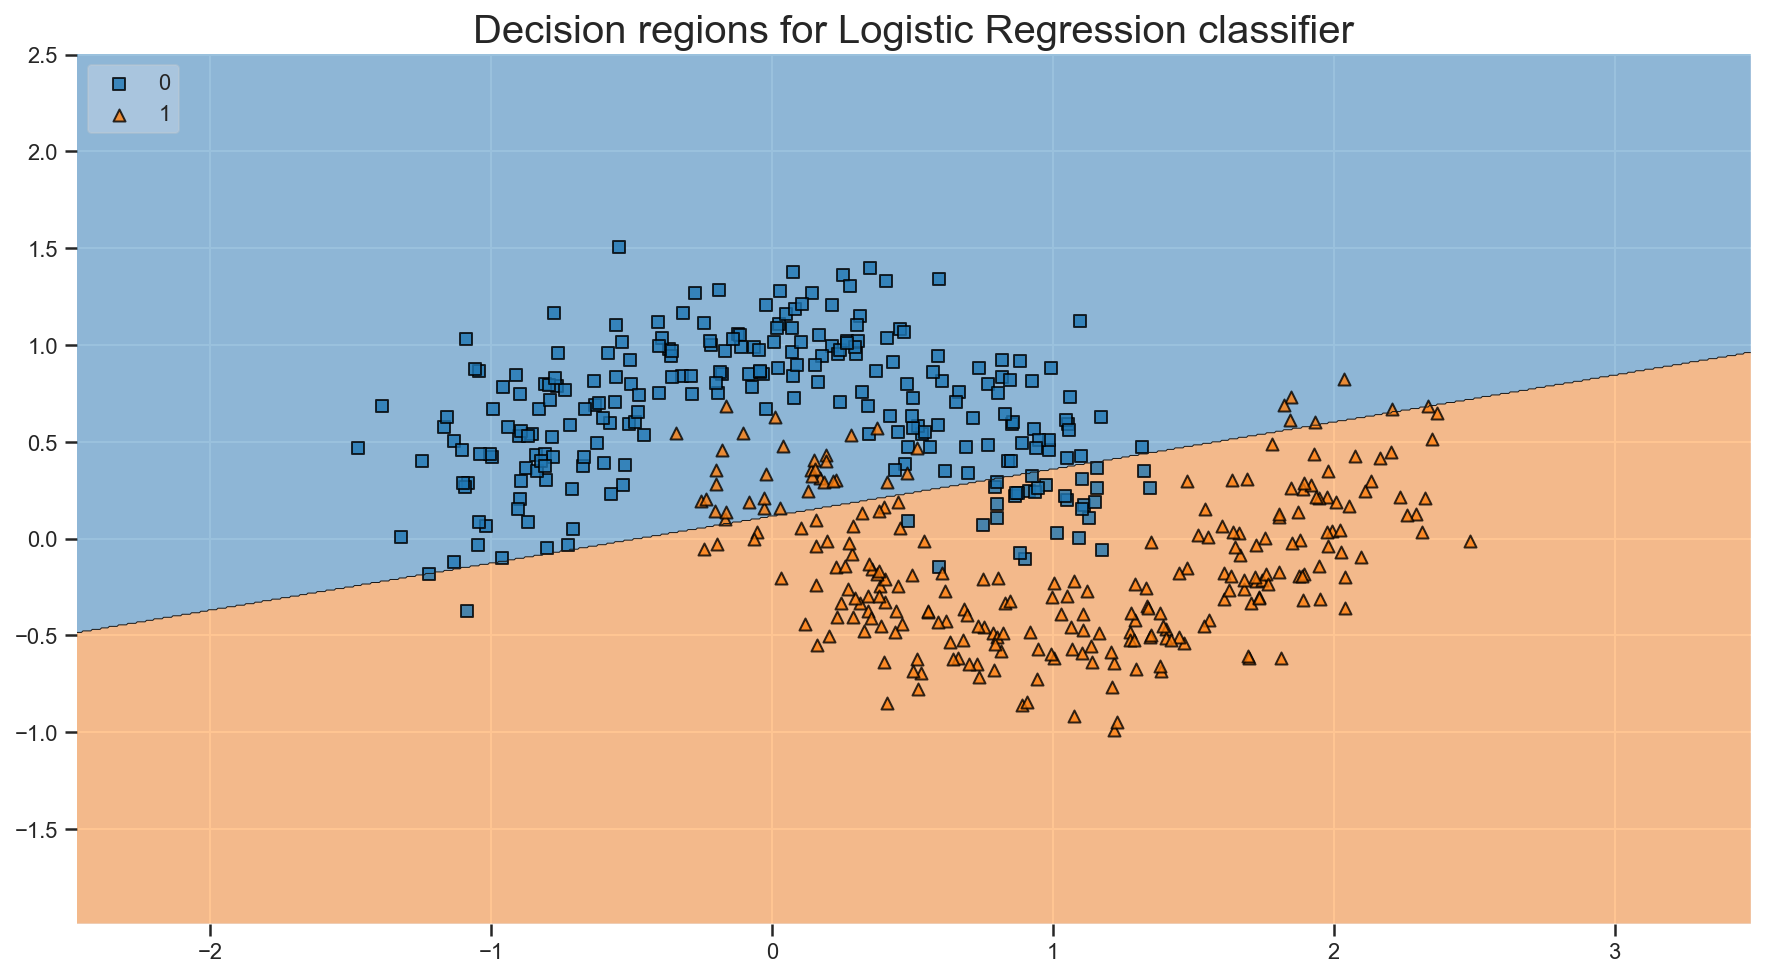

Accuracy score of Logistic Regression classifier is 0.869
F1 score of Logistic Regression classifier is 0.867


In [6]:
plot_decisions_regions(
    lr, 'Logistic Regression classifier',
    X_train, X_test, y_train, y_test
)

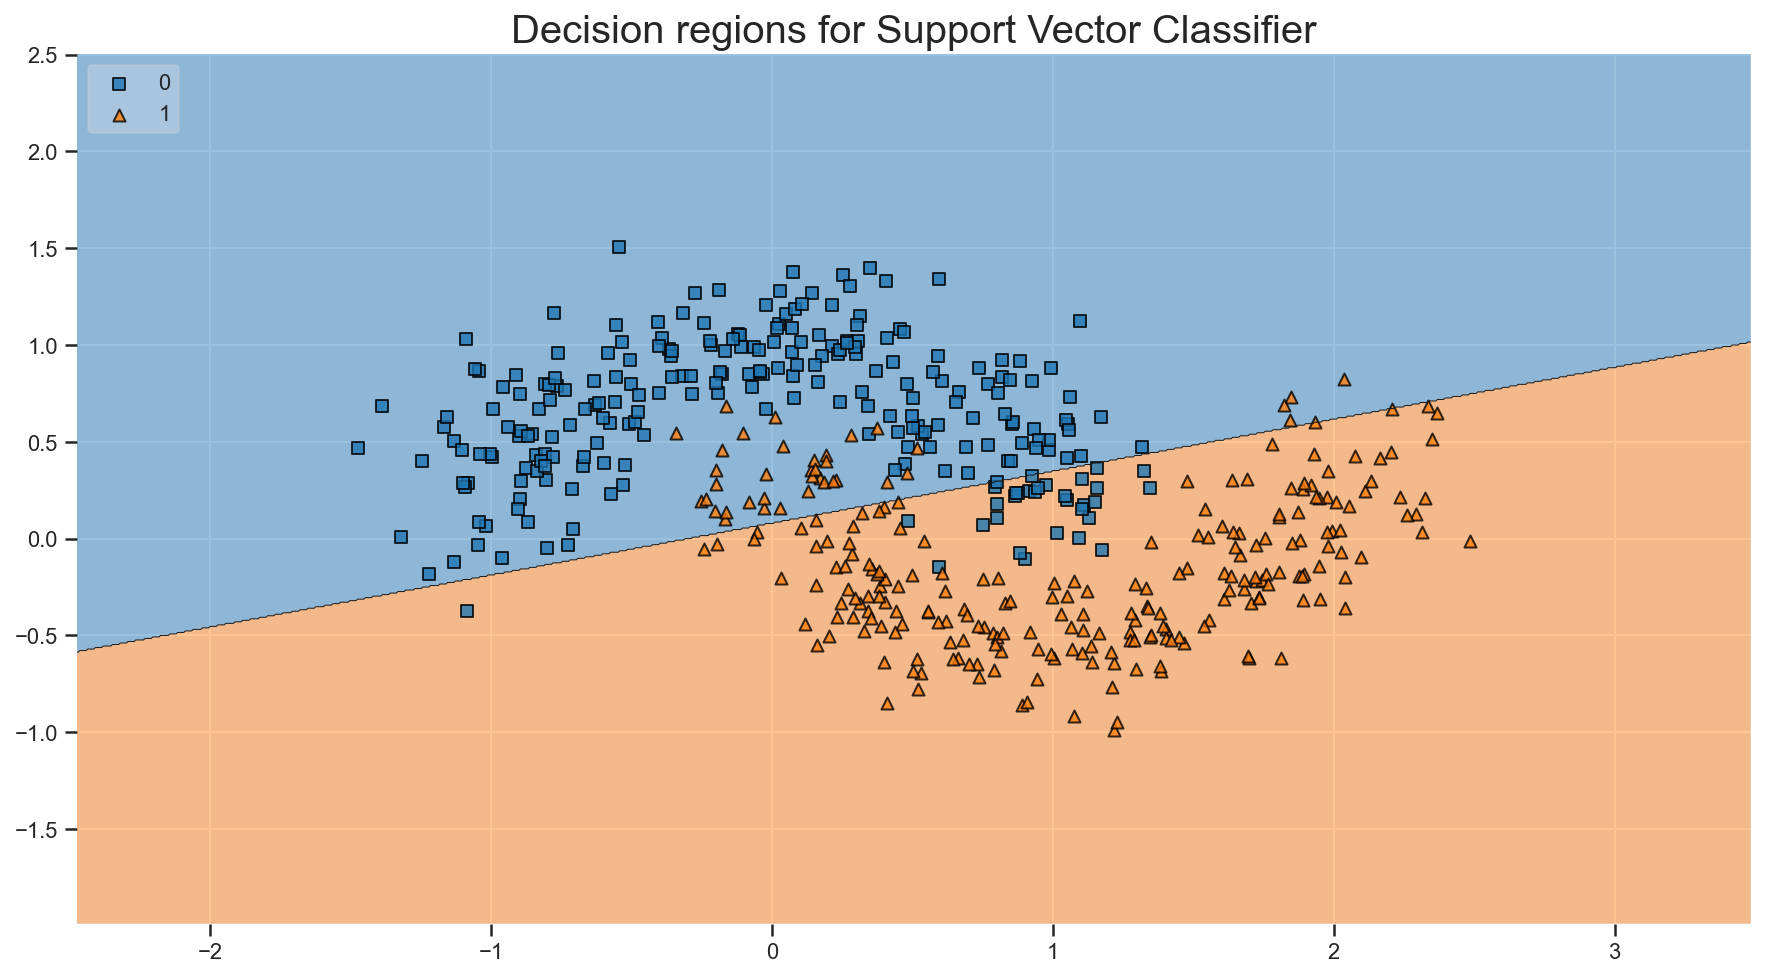

Accuracy score of Support Vector Classifier is 0.880
F1 score of Support Vector Classifier is 0.879


In [7]:
plot_decisions_regions(
    svm, 'Support Vector Classifier',
    X_train, X_test, y_train, y_test
)

**Вывод:** В случае использования линейного ядра в `SVM` результаты почти не отличаются.

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
SVC_PARAMS_GRID = {
    'C': np.linspace(0.1, 10, 15),
    'degree': range(1, 6),
}

In [10]:
def estimate_best_params_SVC(svc_estimator, X_train, X_test, params_grid):
    grid_cv = GridSearchCV(
        estimator=svc_estimator, param_grid=params_grid, 
        cv=5, scoring='accuracy')
    grid_cv.fit(X_train, y_train)
    print('Best params:', grid_cv.best_params_)
    print(f'Best score: {grid_cv.best_score_:.3f}')
    return grid_cv.best_estimator_

#### Support vector classifier with Polynomial kernel

In [11]:
poly_svc = SVC(kernel='poly', random_state=42, tol=1e-3)
best_poly_svc = estimate_best_params_SVC(poly_svc, X_train, y_train, SVC_PARAMS_GRID)

Best params: {'C': 2.2214285714285715, 'degree': 3}
Best score: 0.886


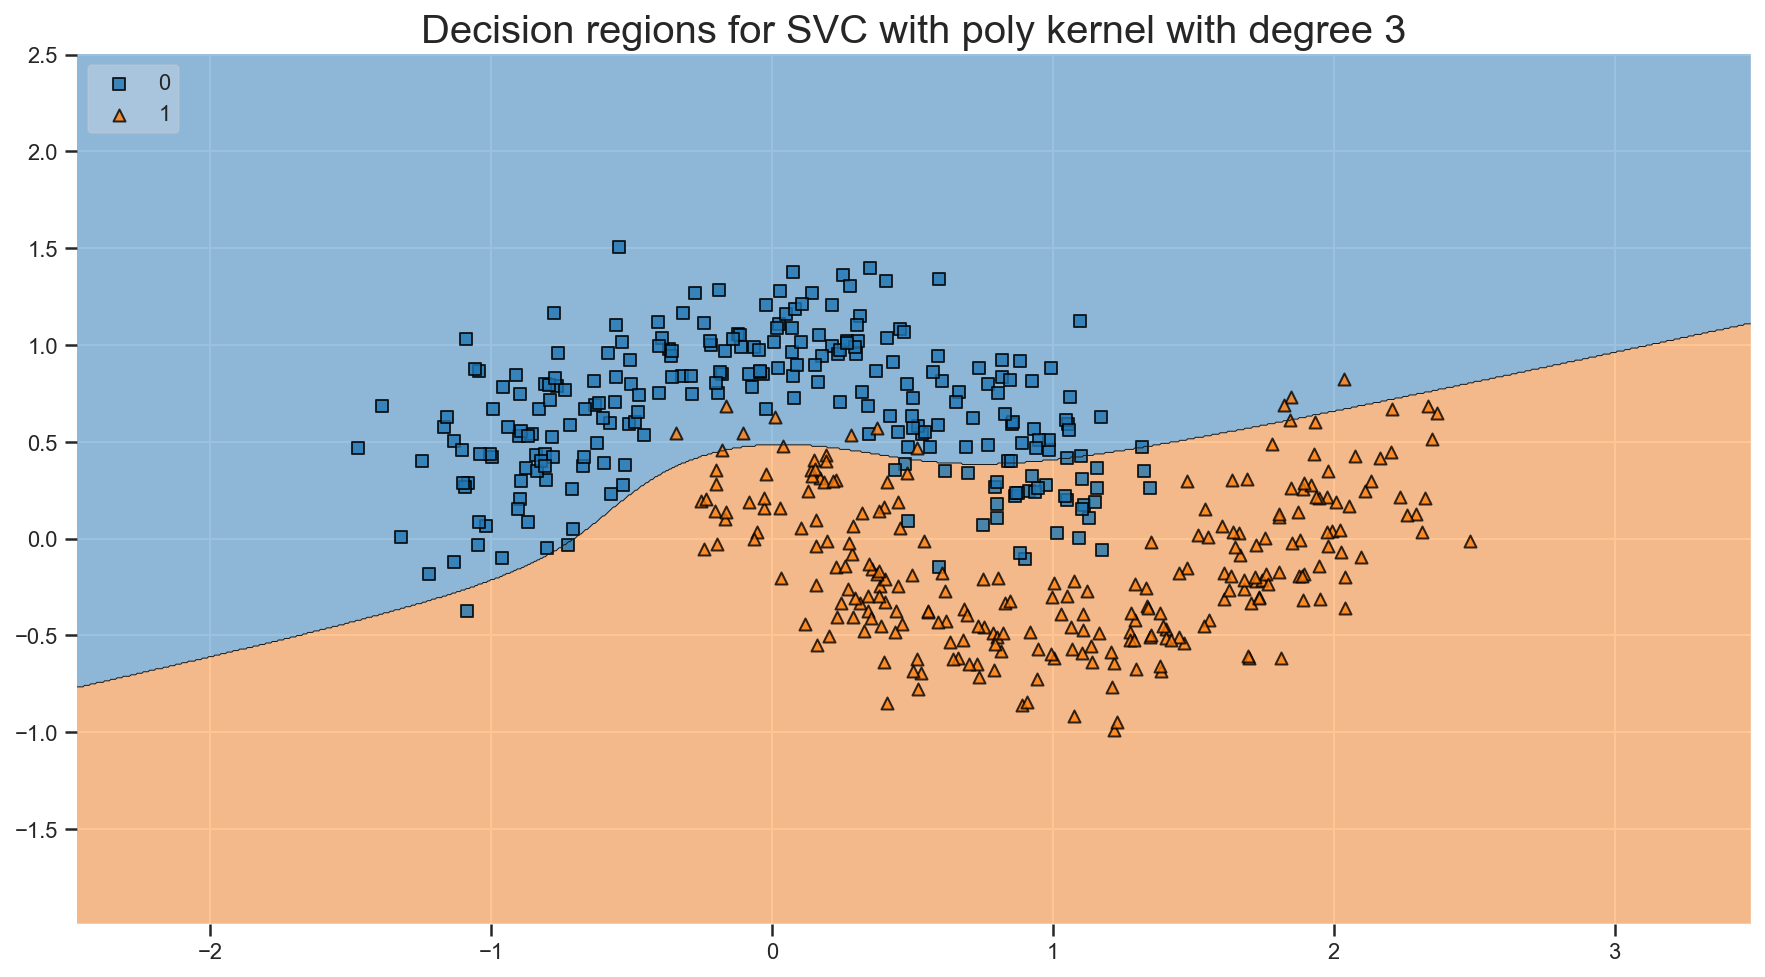

Accuracy score of SVC with poly kernel with degree 3 is 0.920
F1 score of SVC with poly kernel with degree 3 is 0.923


In [12]:
plot_decisions_regions(
    best_poly_svc, 'SVC with poly kernel with degree 3',
    X_train, X_test, y_train, y_test, False
)

#### Support vector classifier with Rbf kernel

In [13]:
rbf_svc = SVC(kernel='rbf', random_state=42, tol=1e-3)
best_rbf_svc = estimate_best_params_SVC(rbf_svc, X_train, y_train, SVC_PARAMS_GRID)

Best params: {'C': 7.171428571428572, 'degree': 1}
Best score: 0.972


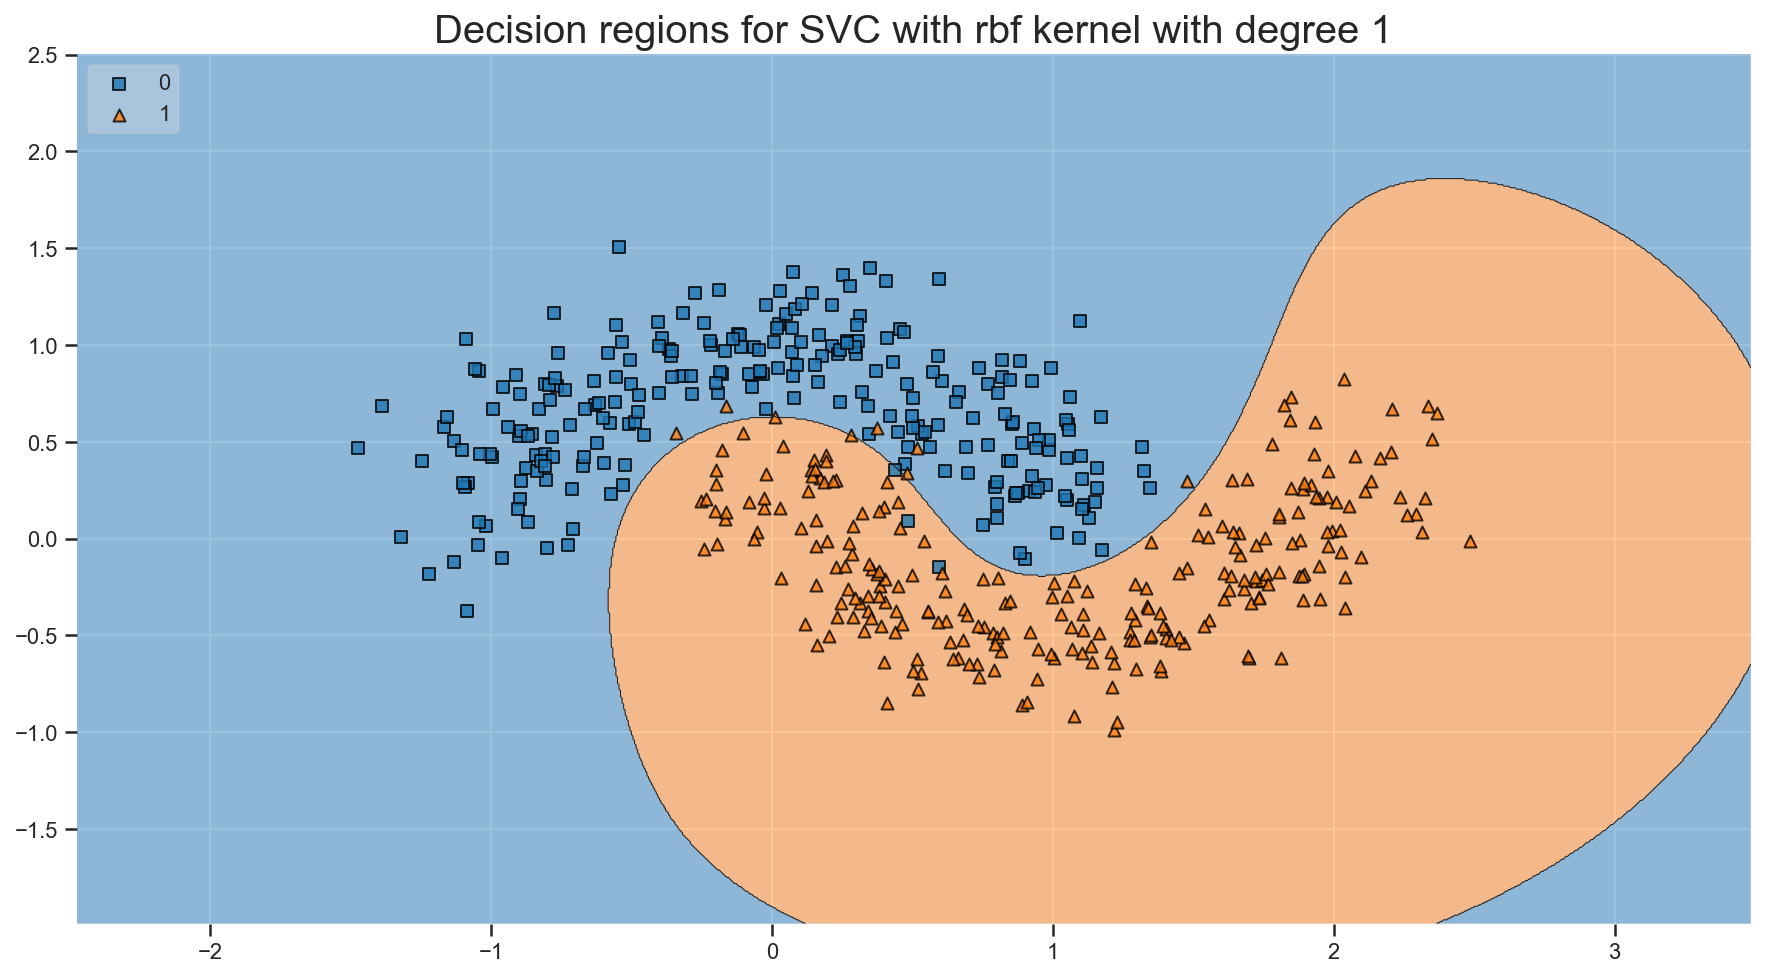

Accuracy score of SVC with rbf kernel with degree 1 is 0.989
F1 score of SVC with rbf kernel with degree 1 is 0.989


In [14]:
plot_decisions_regions(
    best_rbf_svc, 'SVC with rbf kernel with degree 1',
    X_train, X_test, y_train, y_test, False
)

#### Support vector classifier with Sigmoid kernel

In [15]:
sigmoid_svc = SVC(kernel='sigmoid', random_state=42, tol=1e-3)
best_sigmoid_svc = estimate_best_params_SVC(sigmoid_svc, X_train, y_train, SVC_PARAMS_GRID)

Best params: {'C': 0.1, 'degree': 1}
Best score: 0.760


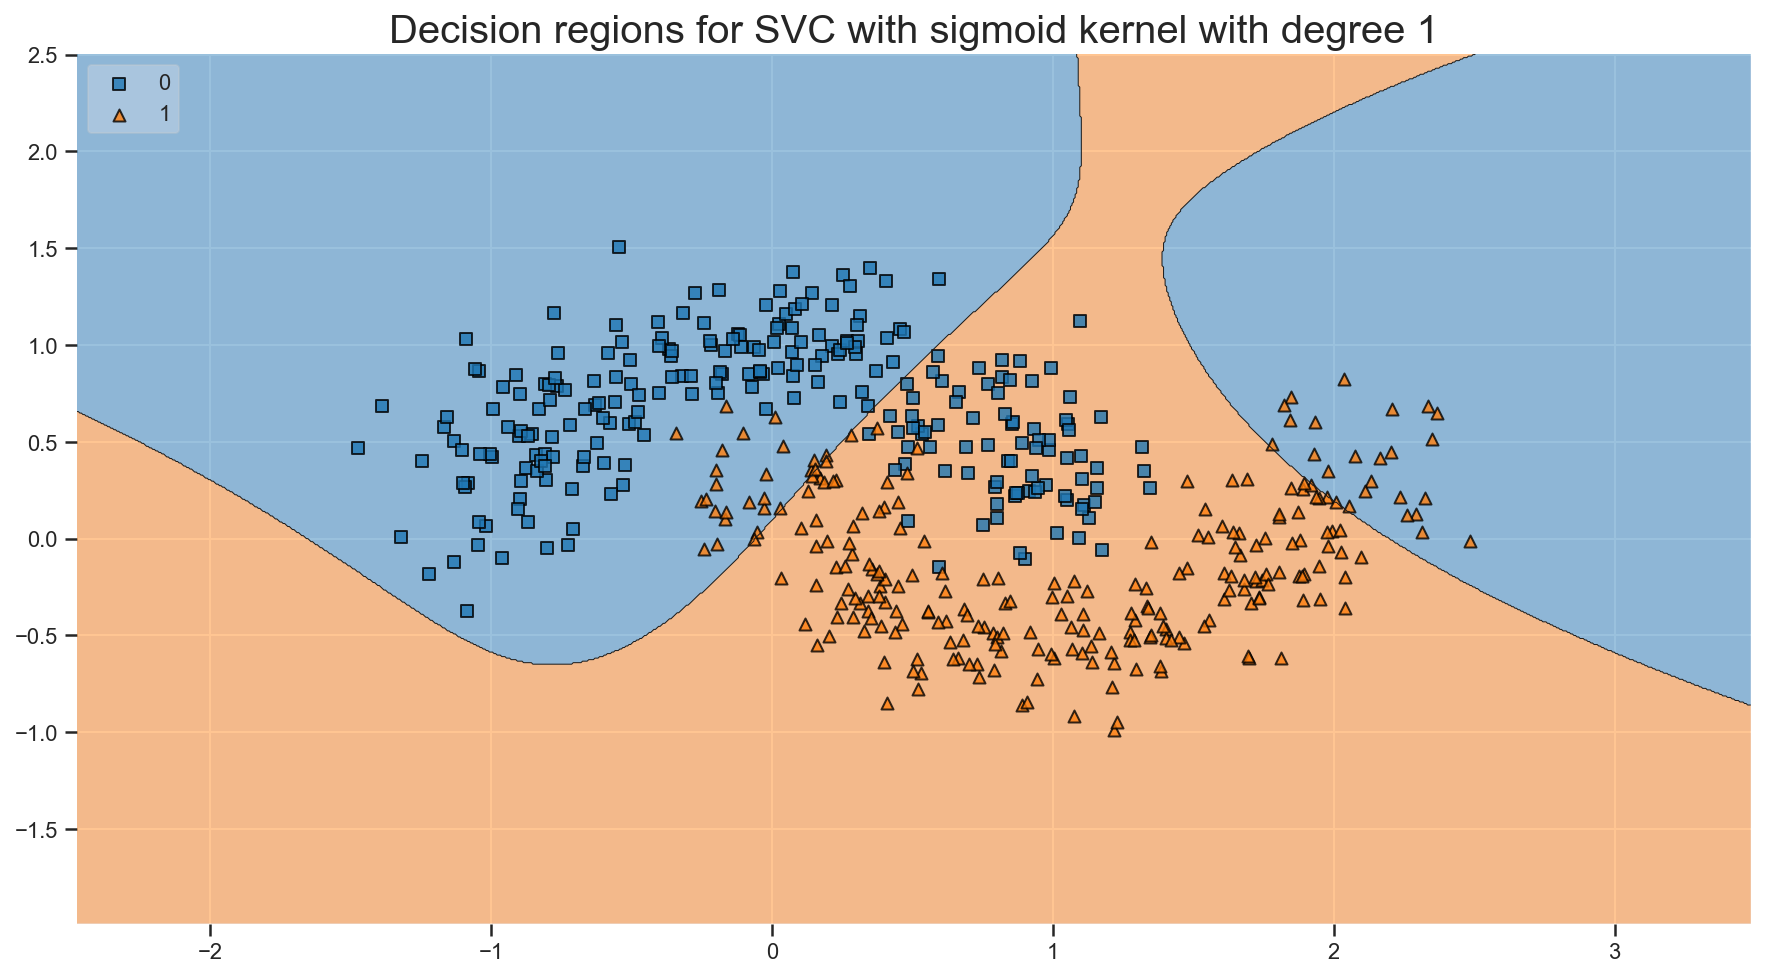

Accuracy score of SVC with sigmoid kernel with degree 1 is 0.714
F1 score of SVC with sigmoid kernel with degree 1 is 0.740


In [16]:
plot_decisions_regions(
    best_sigmoid_svc, 'SVC with sigmoid kernel with degree 1',
    X_train, X_test, y_train, y_test, False
)

**Выводы:**
1. В случае `Poly kernel` и `Rbf kernel` качество классификации сильно улучшилось, а для `Sigmoid kernel` упало.
2. Граница в случае `Poly kernel` и `Rbf kernel` хорошо подстроилась под особенности данных, `Rbf` удалось почти идеально повторить изгиб в данных.
3. `Degree` подбирал с помощью Кросс валидации, получилось для Полиномиального ядра - `3`, для остальных - `1`.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.exceptions import ConvergenceWarning
import warnings

In [18]:
def best_lr_with_poly_features(estimator, X_train, y_train, params_grid: dict):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        grid_cv = GridSearchCV(
            estimator=make_pipeline(
                PolynomialFeatures(),
                estimator),
            param_grid=params_grid,
            cv=5,
            scoring='accuracy')
        grid_cv.fit(X_train, y_train)
        print('Best params:', grid_cv.best_params_)
        print(f'Best score: {grid_cv.best_score_:.3f}')
    return grid_cv.best_estimator_

In [19]:
LR_PARAMS_GRID = {
    'polynomialfeatures__degree': range(2, 7),
}

In [20]:
lr_with_poly_features = best_lr_with_poly_features(
    LogisticRegression(random_state=42, tol=1e-3, penalty='none'),
    X_train, y_train, LR_PARAMS_GRID)

Best params: {'polynomialfeatures__degree': 3}
Best score: 0.966


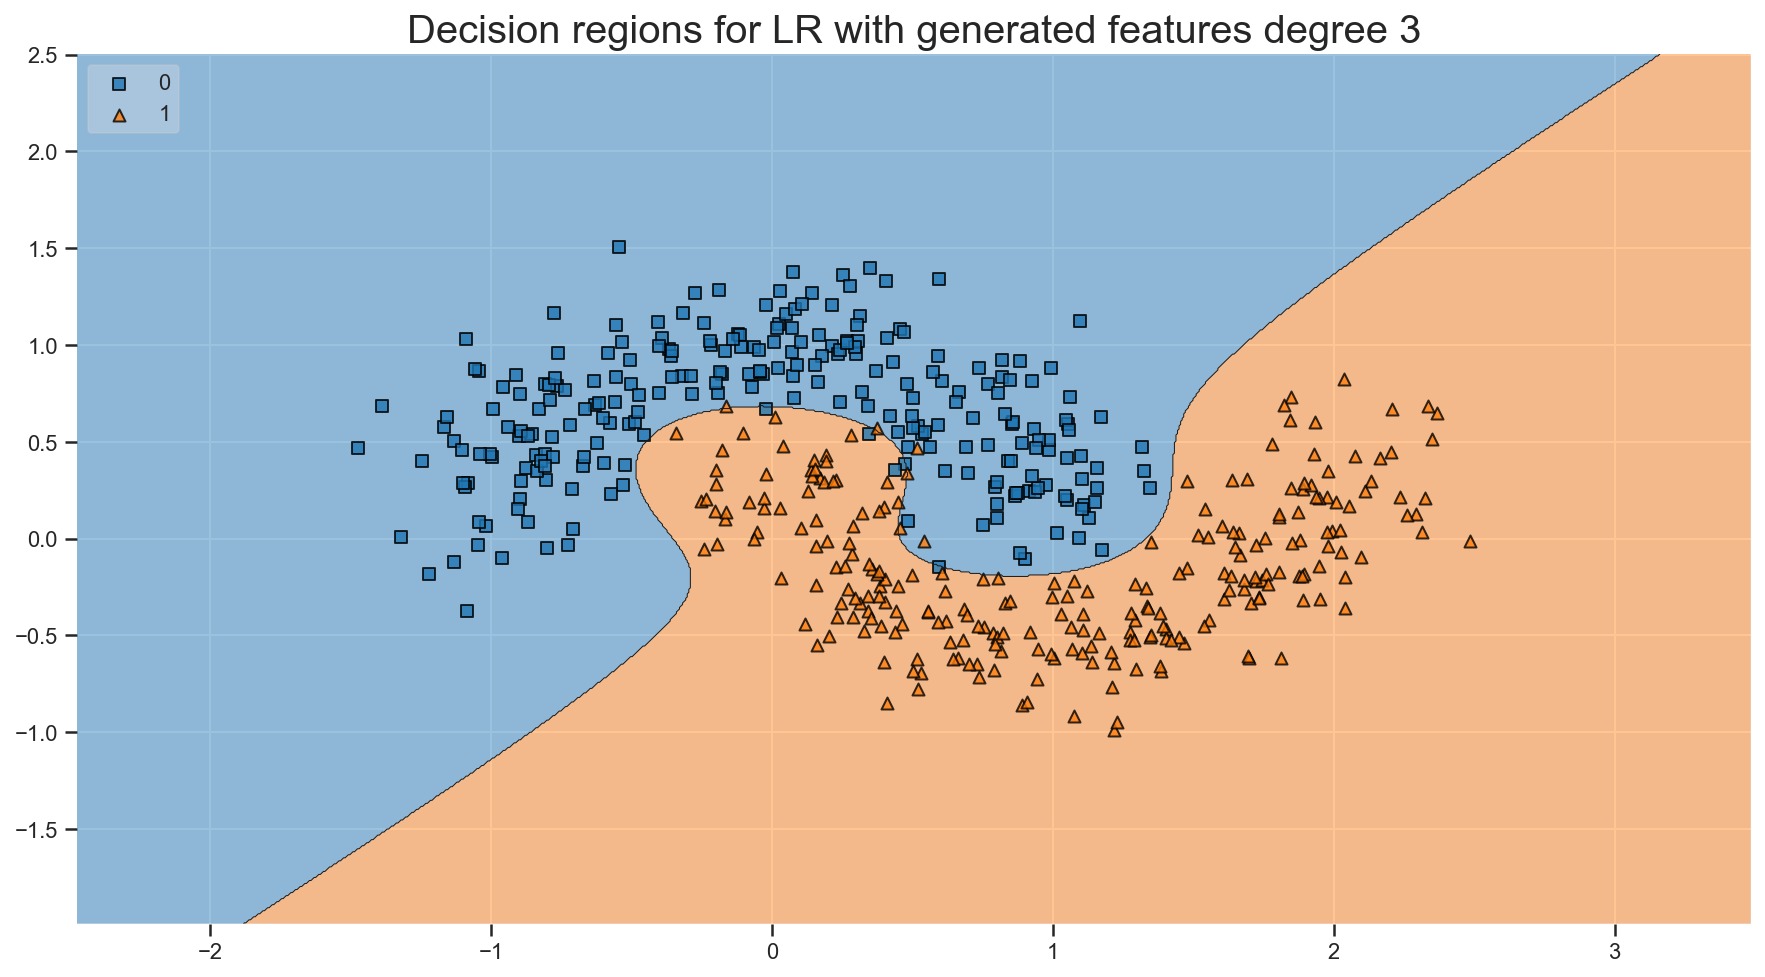

Accuracy score of LR with generated features degree 3 is 0.977
F1 score of LR with generated features degree 3 is 0.977


In [21]:
plot_decisions_regions(
    lr_with_poly_features, 'LR with generated features degree 3',
    X_train, X_test, y_train, y_test, False
)

**Вывод:**
1. Как видим по качеству, данная модель очень близка к лучшей из всех попробованных выше SVC, однако вид границы отличается, если сравнивать его с тем как она выглядит для `rbf kernel`. В данном случае область незамкнутая, а в `rbf` - замкнутая, похожая на сплющенный шарик.
2. Кроссвалидация показала, что наилучшая степень - `3`, что соотвествует степени полученной на кроссвалидации для полиномиального ядра.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

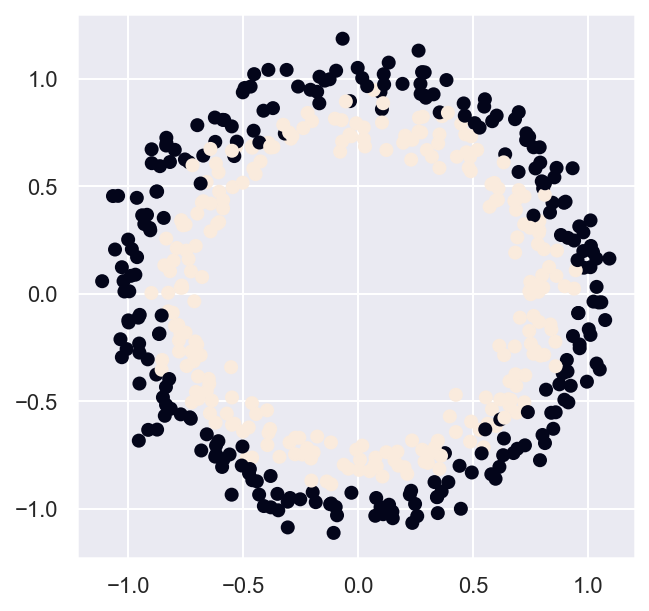

In [22]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

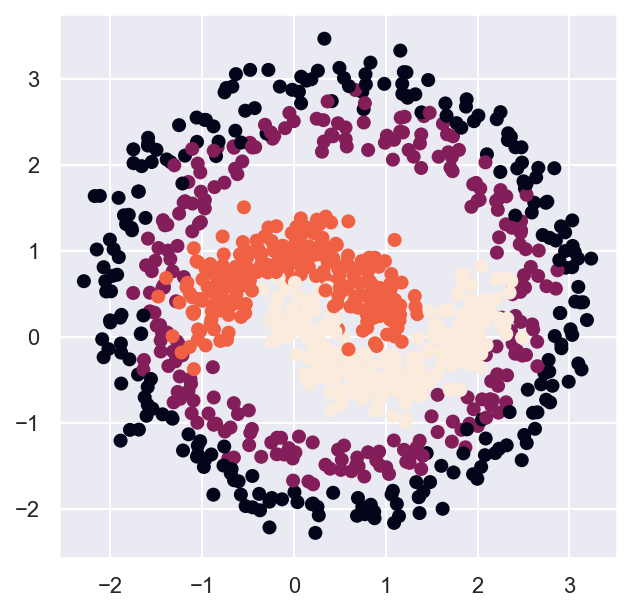

In [23]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

**Замечание:** Кажется, что из всех ядер `rbf` подойдет тут лучше всего, потому что оно как раз генерирует замкнутые области, по визуализации данных видно, что вполне можно подобрать замкнутые шарики, чтобы заключить каждый класс в него.

##### LR with polynomial features

In [24]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, random_state=42, test_size=0.35)

In [25]:
lr_with_poly_features = best_lr_with_poly_features(
    LogisticRegression(random_state=42, tol=1e-3, penalty='none', multi_class='multinomial'),
    X_train, y_train, {'polynomialfeatures__degree': range(2, 15)})

Best params: {'polynomialfeatures__degree': 3}
Best score: 0.926


/Users/mikhail/opt/anaconda3/envs/svm/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:279: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


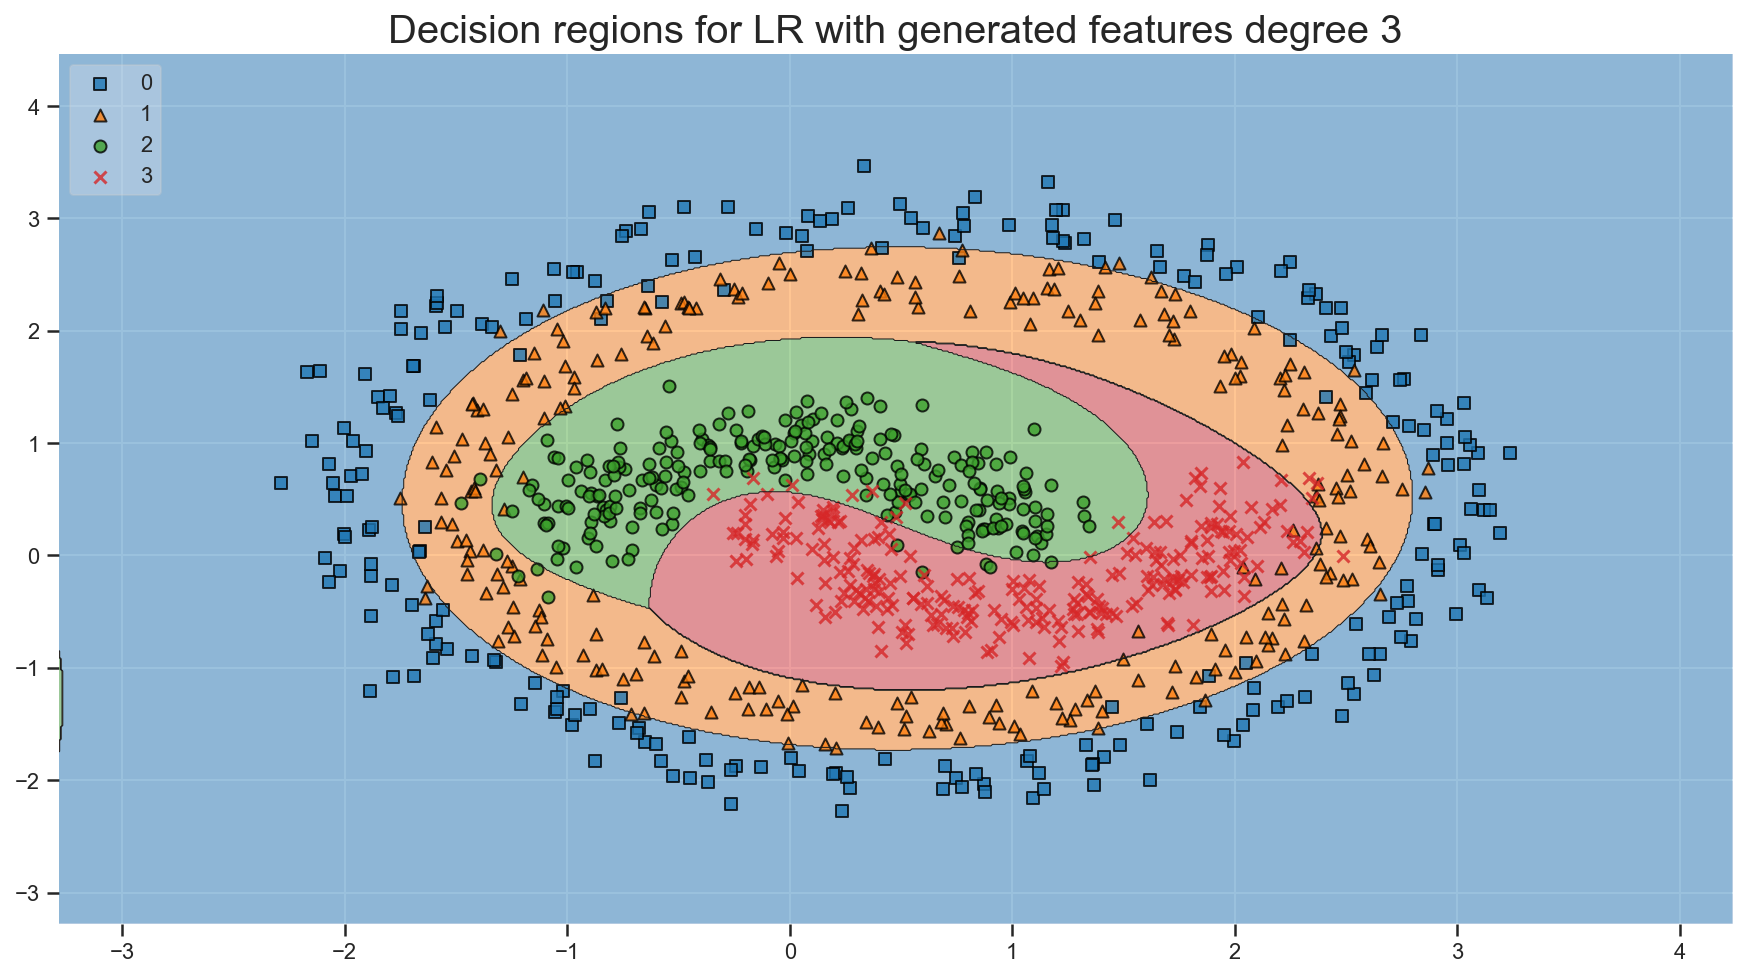

Accuracy score of LR with generated features degree 3 is 0.940
F1 score of LR with generated features degree 3 is 0.940


In [26]:
plot_decisions_regions(
    lr_with_poly_features, 'LR with generated features degree 3',
    X_train, X_test, y_train, y_test, False, True
)

#####  SVC with rbf kernel

In [27]:
rbf_svc = SVC(kernel='rbf', random_state=42, tol=1e-3)
best_rbf_svc = estimate_best_params_SVC(
    rbf_svc, X_train, y_train, 
    {'C': np.linspace(0.1, 10, 30), 'degree': range(1, 10)}
)

Best params: {'C': 5.562068965517241, 'degree': 1}
Best score: 0.923


/Users/mikhail/opt/anaconda3/envs/svm/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:279: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


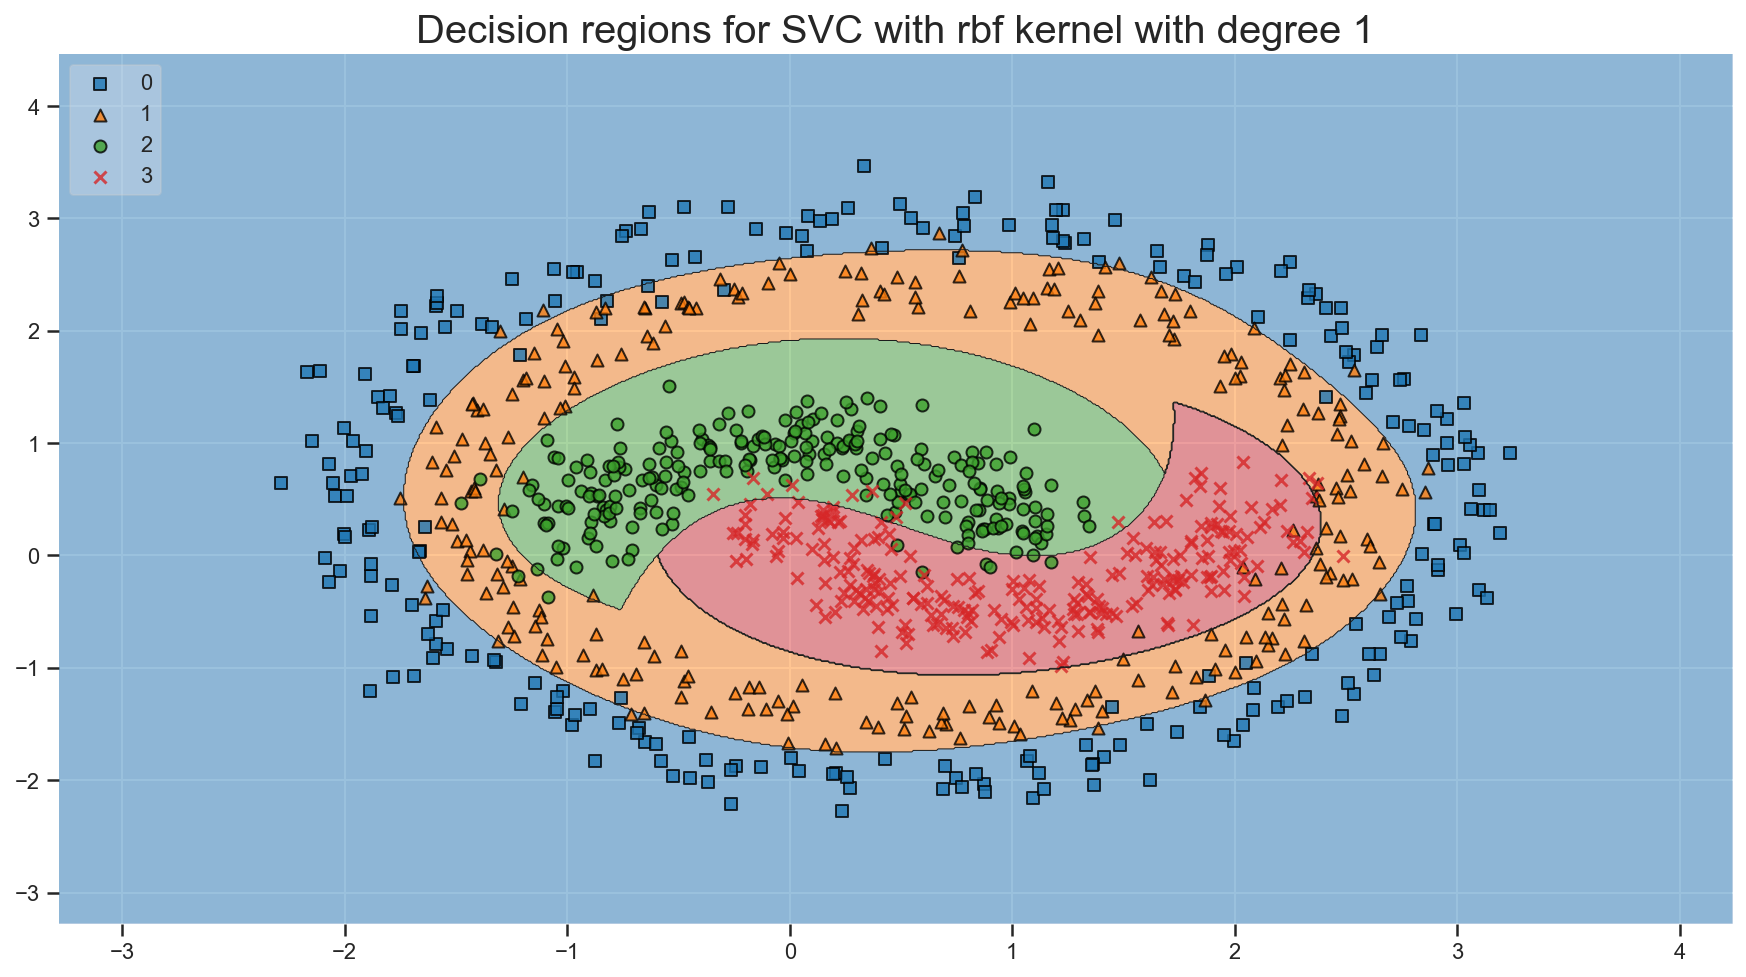

Accuracy score of SVC with rbf kernel with degree 1 is 0.934
F1 score of SVC with rbf kernel with degree 1 is 0.934


In [28]:
plot_decisions_regions(
    best_rbf_svc, 'SVC with rbf kernel with degree 1',
    X_train, X_test, y_train, y_test, False, True
)

**Вывод:** Как видим по качеству обе полученные модели очень близки и при этом обе имеют очень хороший `score`, однако LR все-таки совсем немного лучше по `score`. Сгенерированные фичи очень хорошо помогают LR-у строить хорошие нелинейные поверхности.